# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [0]:
from sklearn import datasets

### **Load dataset**

In [0]:
diabetes = datasets.load_diabetes()

In [3]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

### **Description of the Diabetes dataset**

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### **Feature names**

In [5]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [0]:
X = diabetes.data
Y = diabetes.target

In [7]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [0]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [9]:
X.shape, Y.shape

((442, 10), (442,))

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on the Data Professor GitHub package.

### **Import library**

In [0]:
import pandas as pd

### **Download CSV from GitHub**

In [11]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2020-03-30 07:43:30--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2020-03-30 07:43:36--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.03s   

2020-03-30 07:43:37 (1.25 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



### **Read in CSV file**

In [12]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Split dataset to X and Y variables**

In [13]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [14]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [0]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [17]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [18]:
X_test.shape, Y_test.shape

((102, 13), (102,))

## **Linear Regression Model**

### **Import library**

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [0]:
model = linear_model.LinearRegression()

#### Build training model

In [21]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Apply trained model to make prediction (on test set)

In [0]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [23]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-1.00050462e-01  4.25597647e-02  4.88553708e-02  3.85303261e+00
 -1.71332360e+01  3.91262456e+00  5.06045646e-04 -1.30894438e+00
  2.78526738e-01 -1.06247981e-02 -9.55659863e-01  9.59720319e-03
 -5.09207833e-01]
Intercept: 33.890629034122
Mean squared error (MSE): 26.54
Coefficient of determination (R^2): 0.71


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [24]:
r2_score(Y_test, Y_pred)

0.7072810305481783

In [25]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [26]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [27]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [28]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [0]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [30]:
Y_test

152    15.3
159    23.3
376    13.9
222    27.5
101    26.5
       ... 
383    12.3
87     22.2
22     15.2
127    16.2
504    22.0
Name: medv, Length: 102, dtype: float64

In [31]:
import numpy as np
np.array(Y_test)

array([15.3, 23.3, 13.9, 27.5, 26.5, 19.3, 36.2, 42.3, 23.8, 16.7, 11.3,
       24.4, 20.6, 23.9, 10.9, 37.6, 19. , 22.8, 29.1, 19.9, 18.5, 19.4,
       16.1,  8.4, 12.1, 31.5, 24.7, 26.4, 22.3, 25.2, 15.6, 17.8,  7.2,
       18.5, 18.9, 19.4, 15.6, 18.9, 50. , 13.9, 16.4, 37.9, 10.2, 24.1,
       50. , 20.6, 18.4, 23. , 21.2, 27.9, 44.8, 20.7,  8.3, 11.8, 15. ,
       23.1, 21.9, 24.8, 20.9,  8.1, 18.2, 20.5, 15.6, 21.4, 20. , 22. ,
       22.4, 12.7, 13.5, 22.8, 13.4,  8.4, 50. , 16.5, 22.3, 34.9, 22.5,
       23.1, 21.6, 46.7, 19.5, 11.7, 22.2, 29.9, 50. , 21.2, 30.3,  7. ,
       23.3, 14.5, 19.5, 13.4, 29. , 30.1, 21.9, 11. , 24.3, 12.3, 22.2,
       15.2, 16.2, 22. ])

In [32]:
Y_pred

array([21.3969995 , 25.78787156, 18.00497747, 32.99703165, 25.4474803 ,
       20.73540261, 27.08440187, 36.98678114, 26.53684192, 20.76173404,
       13.60074088, 28.14853668, 19.73530644, 24.62028308, 18.73922314,
       37.27411339, 14.52963986, 28.46143692, 29.94181835, 19.14147404,
       19.18307551, 23.06505316, 18.8400145 ,  5.25333402, 18.47500581,
       30.81620649, 22.63410539, 28.77546229, 27.22815761, 26.88595528,
       13.59371314, 21.08056431,  8.35412851, 19.35533031, 23.43521384,
       23.47412116, 12.5295889 , 21.83429104, 40.41962859, 13.39426264,
       19.33401488, 33.24955401, 16.34851367, 21.23884298, 35.39992502,
       22.13608838, 18.94239498, 23.68601818, 23.33635488, 19.91338453,
       38.04480377, 21.57963707, 13.21478382, 12.25281136, 25.52578575,
       25.50153569, 38.89350142, 30.88847137, 20.95560997,  4.67574832,
       19.26663744, 20.1968555 , 15.73055629, 22.48979365, 23.10502457,
       27.3630545 , 23.38348282, 12.864994  , 13.69752447, 24.61

#### Making the scatter plot

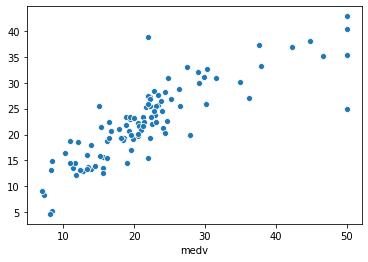

In [33]:
sns.scatterplot(Y_test, Y_pred)

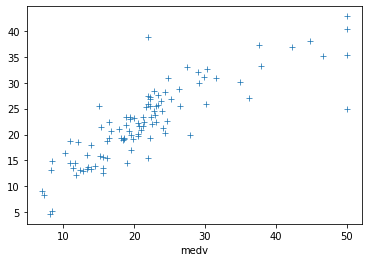

In [34]:
sns.scatterplot(Y_test, Y_pred, marker="+")

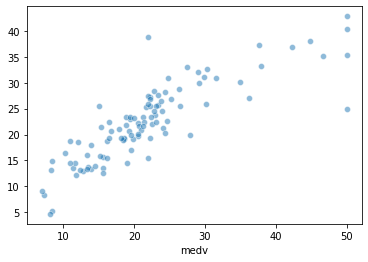

In [35]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)